<a href="https://colab.research.google.com/github/zeraimundo/IP_Exercicio_05042021/blob/main/%5BRespostas%5D_Atividade_Individual_Programa%C3%A7%C3%A3o_e_Estrutura_de_Dados_Estruturas_Lineares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação e Estrutura de Dados - Estruturas Lineares - Atividade Individual 

Vamos praticar o conteúdo visto até então envolvendo estruturas lineares (listas encadeadas, filas e pilhas)? Das seis questões a seguir, escolha no mínimo **TRÊS** para resolver e fornecer a resposta no campo determinado.

**1.** Implemente uma lista encadeada seguindo os 
exemplos passados anteriormente (criando a classes Nó e 
ListaEncadeada) e faça um programa que junte duas listas, dando origem a uma única lista com a terceira apontando seu primeiro elemento.
Exemplo:

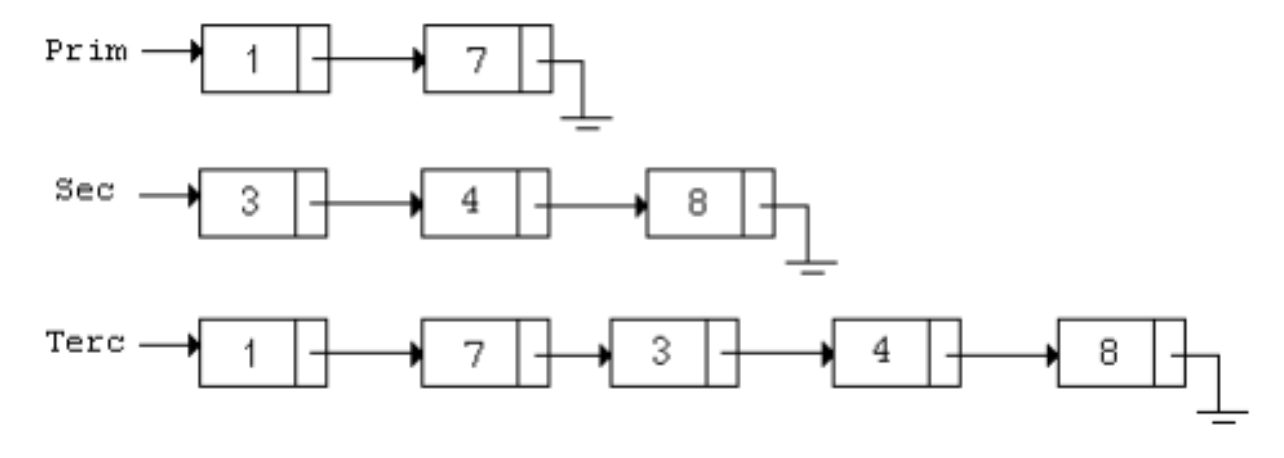


In [ ]:
class No:
    def __init__(self, carga: object = None, 
                 ant: 'No' = None,
                 prox: 'No' = None):
        self.carga = carga
        self.prox = prox
        self.ant = ant

    def __str__(self):
        return str(self.carga)

class ListaEncadeada:
    def __init__(self):
        self.cabeca = None
        self.cauda = None  

    def imprimir(self):
        if self.cabeca is None:
            print("Lista Vazia")
            return
        atual: 'No' = self.cabeca
        while atual is not None:
            print(str(atual.carga) + " ")
            atual = atual.prox

    def inserir_valor_no_final(self, valor):
        novo = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo ## se a lista está vazia, o novo elemento é referenciado tanto como cabeca, como cauda
        else:
            self.cauda.prox = novo
            self.cauda = novo


In [ ]:
def juntarListas(lista1: 'ListaEncadeada', lista2: 'ListaEncadeada'):
  lista1.cauda.prox = lista2.cabeca
  lista2.cabeca.ant = lista1.cauda
  return lista1

def juntarListas2(lista1: 'ListaEncadeada', lista2: 'ListaEncadeada'):
  listaNova = ListaEncadeada()
  atual = lista1.cabeca
  while atual is not None:
    listaNova.inserir_valor_no_final(atual.carga)
    atual = atual.prox

  atual = lista2.cabeca
  while atual is not None:
    listaNova.inserir_valor_no_final(atual.carga)
    atual = atual.prox

  return listaNova


lista1: 'ListaEncadeada' = ListaEncadeada()
lista1.inserir_valor_no_final(500)
lista1.inserir_valor_no_final(200)
lista1.inserir_valor_no_final(100)
lista1.inserir_valor_no_final(800)
lista1.inserir_valor_no_final(900)

lista2: 'ListaEncadeada' = ListaEncadeada()
lista2.inserir_valor_no_final(411)
lista2.inserir_valor_no_final(223)
lista2.inserir_valor_no_final(333)
lista2.inserir_valor_no_final(887)
lista2.inserir_valor_no_final(999)

lista3 = juntarListas(lista1, lista2)
lista3.imprimir()



\*2.* Dada uma lista encadeada que armazena números inteiros escreva uma função que transforma a lista dada em duas listas encadeadas: a primeira contendo os elementos cujo conteúdo é par e a segunda contendo os elementos com conteúdos ímpares. Sua função deve manipular somente os apontadores e não o conteúdo das células. Exemplo:

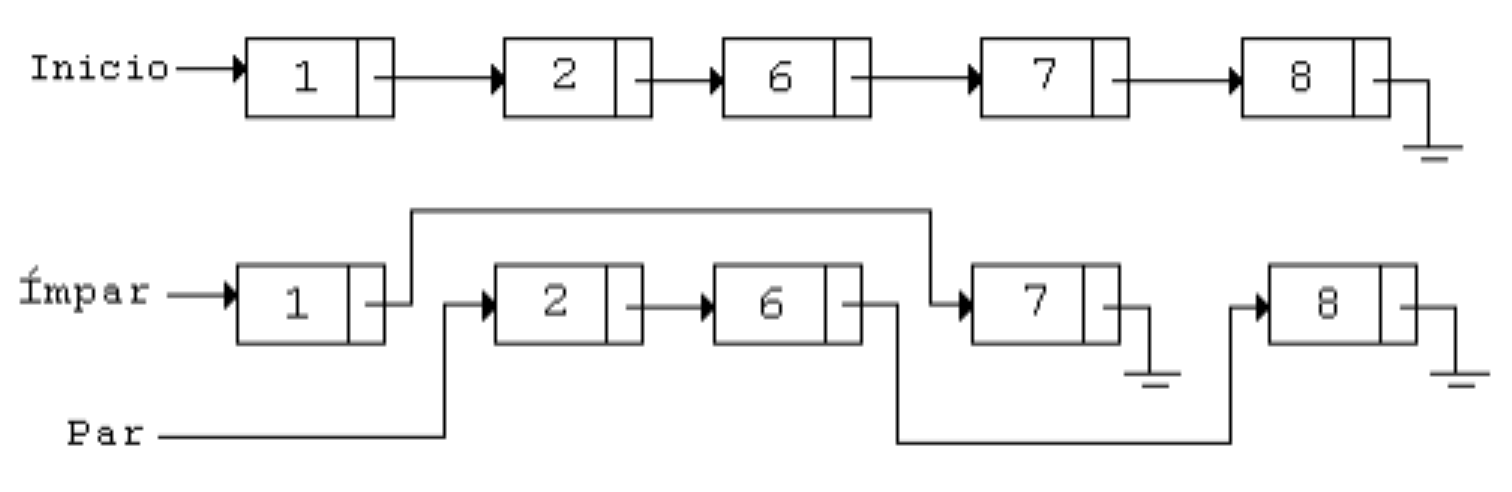

In [ ]:
def extraiParesImpares(lista: 'ListaEncadeada'):
  atual = lista.cabeca
  pares = ListaEncadeada()
  impares = ListaEncadeada()

  while atual is not None:
    if atual.carga % 2 == 0: 
      pares.inserir_valor_no_final(atual.carga)
    else:
      impares.inserir_valor_no_final(atual.carga)
    atual = atual.prox

  return pares, impares

inicio: 'ListaEncadeada' = ListaEncadeada()
inicio.inserir_valor_no_final(1)
inicio.inserir_valor_no_final(2)
inicio.inserir_valor_no_final(6)
inicio.inserir_valor_no_final(7)
inicio.inserir_valor_no_final(8)

pares, impares = extraiParesImpares(inicio)
print("Pares =")
pares.imprimir()
print("Ímpares =")
impares.imprimir()


Pares =
2 
6 
8 
Ímpares =
1 
7 


*3.* Faça um procedimento que remova todas as ocorrências de elemento x de uma Lista **Duplamente** Encadeada.

In [ ]:
class ListaDuplamenteEncadeada(ListaEncadeada): # herdamos da classe ListaEncadeada para reaproveitar o método imprimir_lista
  def __init__(self):
    self.cabeca = None
    self.cauda = None

  def inserir_no_final(self, valor):
    novo: 'No' = No(valor)
    if self.cabeca is None:
      self.cabeca = self.cauda = novo
    else:
      novo.ant = self.cauda 
      novo.ant.prox = novo 
      self.cauda = novo 

  def remover_do_inicio(self):
    if self.cabeca is None:
      print("Lista vazia")
      return
    
    if self.cabeca == self.cauda:
      self.cabeca = self.cauda = None
    else:
      self.cabeca = self.cabeca.prox 
      self.cabeca.ant = None

  #### Resposta ####

  def remover_por_valor(self, valor):
    if self.cabeca is not None and self.cabeca.carga == valor:
      self.remover_do_inicio()
      return True

    atual: 'No' = self.cabeca
    while atual is not None:
      if atual.carga == valor:
        atual.ant.prox = atual.prox
        if atual.prox is not None:
          atual.prox.ant = atual.ant
        else: 
          self.cauda = atual
        return True
      atual = atual.prox
    return False

  # O método remover_por_valor só remove a primeira ocorrência, é preciso garantir que todas sejam removidas  
  def remover_ocorrencias(self, valor):
    while self.remover_por_valor(valor) == True: 
      pass
     
lista: 'ListaDuplamenteEncadeada' = ListaDuplamenteEncadeada()
lista.inserir_no_final(10)
lista.inserir_no_final(10)
lista.inserir_no_final(10)
lista.inserir_no_final(50)
lista.inserir_no_final(10)
lista.inserir_no_final(10)
lista.remover_ocorrencias(10)
lista.imprimir()

50 


**4.** Implemente uma Lista **Circular** e escreva uma função para contar o número de elementos que ela possui. 


In [ ]:
class ListaCircular:

    def __init__(self):
        self.cabeca = None
        self.cauda = None 
        self.total = 0

    def __len__(self):
      return self.total
      
    def imprimir_lista(self):
        if self.cabeca is None:
            print("Lista vazia")
            return

        atual: 'No' = self.cabeca
        print(atual)
        while atual is not self.cauda: 
            print(atual.prox)
            atual = atual.prox

    def inserir_no_inicio(self, valor: object):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:        
            novo.prox = self.cabeca
            self.cabeca = novo
            novo.prox.ant = novo
            self.cabeca.ant = self.cauda 
            self.cauda.prox = self.cabeca 
        self.total += 1

    def inserir_no_final(self, valor):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:
          novo.ant = self.cauda 
          novo.ant.prox = novo 
          self.cauda = novo 
          self.cauda.prox = self.cabeca 
          self.cabeca.ant = self.cauda
        self.total += 1

    def remover_do_inicio(self):
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            self.cabeca = self.cabeca.prox 
            self.cabeca.ant = self.cauda
            self.cauda.prox = self.cabeca
        self.total -= 1

    def remover_do_final(self):
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            self.cauda = self.cauda.ant
            self.cauda.prox = self.cabeca
            self.cabeca.ant = self.cauda
        self.total -= 1

   
lista: 'ListaCircular' = ListaCircular()
lista.inserir_no_final(100)
lista.inserir_no_final(200)
lista.inserir_no_final(300)
lista.inserir_no_final(400)
lista.remover_do_inicio()
lista.remover_do_final()
lista.inserir_no_inicio(800)
print(len(lista))

3


5. Utilize como base uma implementação de Fila/Pilha baseada em estruturas encadeadas, conforme visto em sala de aula. Na classe `Pilha`, implemente um método chamado `remover_ate_elemento(elemento)` que remova o elemento informado via parâmetro. Para que seja possível remover esse elemento, todos os elementos anteriores a ele devem ser desempilhados/removidos também.

In [ ]:
class No:
    def __init__(self, carga: object = None, 
                 ant: 'No' = None,
                 prox: 'No' = None):
        self.carga = carga
        self.prox = prox
        self.ant = ant

    def __repr__(self):
      return '%s -> %s' % (self.carga, self.prox)

class ListaDuplamenteEncadeada(): 
    def __init__(self):
        self.cabeca = None
        self.cauda = None
    
    def __repr__(self):
        return "[" + str(self.cabeca) + "]"

    
    def inserir_no_inicio(self, valor: object):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:        
            novo.prox = self.cabeca
            self.cabeca = novo
            novo.prox.ant = novo

    def inserir_no_final(self, valor):
        novo: 'No' = No(valor)
        if self.cabeca is None:
            self.cabeca = self.cauda = novo
        else:
          novo.ant = self.cauda # O anterior do nó novo será a cauda atual
          novo.ant.prox = novo # O próximo do elemento anterior será o novo elemento a ser inserido
          self.cauda = novo # a cauda passa a ser o elemento novo a ser inserido

    def remover_do_inicio(self):
        elemento_removido = self.cabeca
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            self.cabeca = self.cabeca.prox 
            self.cabeca.ant = None # O anterior da nova cabeça agora passa a apontar para None

        return elemento_removido

    def remover_do_final(self):
        elemento_removido = self.cauda
        if self.cabeca is None:
            print("Lista vazia")
            return
        
        if self.cabeca == self.cauda:
            self.cabeca = self.cauda = None
        else:
            # Note que agora não é mais necessário percorrer a lista até o final, basta começar navegando pela cauda
            self.cauda = self.cauda.ant # Faz a cauda apontar agora para o penúltimo elemento da lista
            self.cauda.prox = None # o próximo da nova cauda agora passa a pontar para None

        return elemento_removido
      
class Fila(ListaDuplamenteEncadeada):
  def inserir(self, elemento):
    self.inserir_no_final(elemento)

  def remover(self):
    return self.remover_do_inicio()


class Pilha(ListaDuplamenteEncadeada):
  def push(self, elemento):
    self.inserir_no_inicio(elemento)

  def pop(self):
    return self.remover_do_inicio()

In [ ]:
class Pilha2(Pilha):
  def remover_ate_elemento(self, elemento):
    atual = self.cabeca
    while atual is not None and atual.carga is not elemento:
      
      if atual.prox is not None:
        self.cabeca = atual.prox
      atual = atual.prox

      ## remove o próprio elemento
      if atual is not None and atual.carga == elemento:
        self.cabeca = atual.prox

pilha2 = Pilha2()
pilha2.push(5)
pilha2.push(10)
pilha2.push(15)
pilha2.push(25)
pilha2.push(30)
print(pilha2)
print("chamando método remover_ate_elemento")
pilha2.remover_ate_elemento(10)
print(pilha2)

6. Escreva um programa que determine se dada cadeia de caracteres (String) é um palíndromo ou não, isto é, se pode ser lida da mesma maneira para frente ou para trás. Em cada ponto você pode ler somente um caractere da cadeia dada. Considere usar pilhas múltiplas.

Exemplos de palíndromos: "socorram me subi no onibus em marrocos", "ovo", "reviver", "amor a roma", "a grama é amarga"

In [ ]:
class PilhaPalindromo(Pilha):

  ## Insire numa pilha auxiliar, o que irá colocar na ordem inversa
  def inverter(self):
    pilha_aux = Pilha()
    atual = self.cabeca
    while atual is not None:
      pilha_aux.push(atual.carga)
      atual = atual.prox
    return pilha_aux

  # converte palavra para lista e insere cada caractere como um nó da pilha
  # para evitar que a palavra seja inserida na ordem inversa, foi necessário usar uma pilha auxiliar
  def inserir_palavra(self, palavra):
    pilha_aux = Pilha()

    for letra in list(palavra):
      pilha_aux.push(letra)

    while pilha_aux.cabeca is not None:
      self.push(pilha_aux.pop().carga)

  # método que é usado quando se compara uma pilha com outra (pilha == pilha2)
  def __eq__(self, pilha):
    atual = self.cabeca
    atual2 = pilha.cabeca
    while atual is not None and atual2 is not None:
      # Caso algum dos elementos da pilha for diferente, será retornado False
      if atual.carga != atual2.carga:
        return False
      atual = atual.prox
      atual2 = atual2.prox
    return True


def checa_palindromo(palavra):
  pilha = PilhaPalindromo()
  pilha.inserir_palavra(palavra.casefold().replace(" ", "")) # Remover espaços e uppercase
  # Palavra vazia é palíndromo
  if pilha.cabeca == None:
    return True
  return pilha == pilha.inverter()

if checa_palindromo("socorram me subi no onibus em marrocos"):
  print("Palíndromo!")
else:
  print("Não é palíndromo!")


Palíndromo!
